In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
df = pd.read_excel('penelitian_acak2.xlsx')

In [7]:
df

,namaprovinsi,namakabupaten,namakecamatan,namakelurahan,baduta,balita,pus,pus_hamil,sumber_air_layak_tidak,jamban_layak_tidak,terlalu_muda,terlalu_tua,terlalu_dekat,terlalu_banyak,bukan_peserta_kb_modern,risiko_stunting,Tahun,LAT,LONG
0,JAWA BARAT,KOTA BOGOR,BOGOR BARAT,MARGA JAYA,V,X,X,V,X,X,X,X,X,X,X,0,2023,NaN,NaN
1,JAWA BARAT,KOTA BOGOR,BOGOR TENGAH,BABAKAN,V,V,X,X,X,X,V,X,X,X,X,0,2023,NaN,NaN
2,JAWA BARAT,KOTA BOGOR,BOGOR TENGAH,BABAKAN,V,V,V,X,V,X,X,X,X,X,X,0,2023,NaN,NaN
3,JAWA BARAT,KOTA BOGOR,BOGOR TENGAH,PALEDANG,V,X,V,X,X,V,V,X,X,X,X,1,2023,NaN,NaN
4,JAWA BARAT,KOTA BOGOR,BOGOR SELATAN,KERTAMAYA,X,V,X,V,X,X,X,X,X,X,X,0,2023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307462,JAWA BARAT,KOTA BOGOR,TANAH SAREAL,CIBADAK,X,V,X,V,V,V,V,V,V,V,X,0,2024,NaN,NaN
307463,JAWA BARAT,KOTA BOGOR,TANAH SAREAL,CIBADAK,X,V,V,V,X,X,V,V,V,X,X,1,2024,NaN,NaN
307464,JAWA BARAT,KOTA BOGOR,TANAH SAREAL,CIBADAK,V,X,X,V,X,V,V,V,V,V,X,0,2024,NaN,NaN
307465,JAWA BARAT,KOTA BOGOR,TANAH SAREAL,CIBADAK,V,X,X,X,X,X,V,V,V,V,X,0,2024,NaN,NaN


In [8]:
binary_cols = df.columns[4:-4]  # ambil kolom binary dari 'baduta' s.d. 'bukan_peserta_kb_modern'
for col in binary_cols:
    df[col] = df[col].map({'X': 0, 'V': 1})

In [9]:
df = df.drop(columns=['namaprovinsi',	'namakabupaten','namakecamatan', 'namakelurahan', 'Tahun', 'LAT', 'LONG',])

In [10]:
df = df.dropna()

In [11]:
X = df.drop(columns=['risiko_stunting'])
y = df['risiko_stunting']

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(1, X.shape[1])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9429 - loss: 0.1716 - val_accuracy: 0.9903 - val_loss: 0.0474
Epoch 2/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9906 - loss: 0.0488 - val_accuracy: 0.9906 - val_loss: 0.0468
Epoch 3/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9903 - loss: 0.0484 - val_accuracy: 0.9906 - val_loss: 0.0456
Epoch 4/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9904 - loss: 0.0479 - val_accuracy: 0.9906 - val_loss: 0.0456
Epoch 5/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9905 - loss: 0.0461 - val_accuracy: 0.9905 - val_loss: 0.0459
Epoch 6/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9904 - loss: 0.0462 - val_accuracy: 0.9906 - val_loss: 0.0453
Epoch 7/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9906 - loss: 0.0448 - val_accuracy: 0.9905 - val_loss: 0.0454
Epoch 8/50
12229/12229 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Uji: {acc:.4f}")

1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0449
Akurasi Uji: 0.9907


In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1911/1911 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step


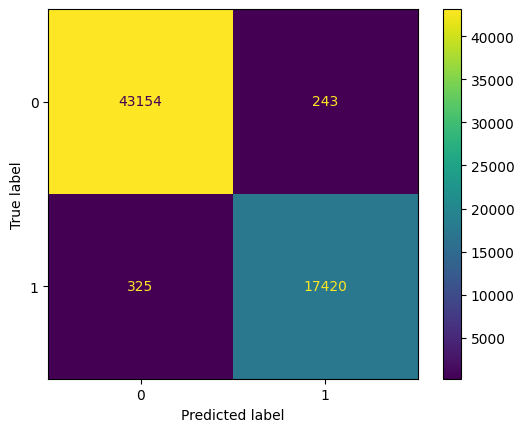

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_label = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     43397
           1       0.99      0.98      0.98     17745

    accuracy                           0.99     61142
   macro avg       0.99      0.99      0.99     61142
weighted avg       0.99      0.99      0.99     61142



In [20]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc:.4f}")

ROC-AUC Score: 0.9943


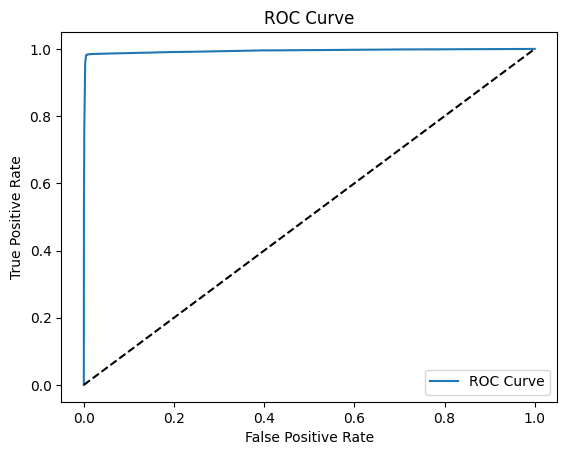

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')  # garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



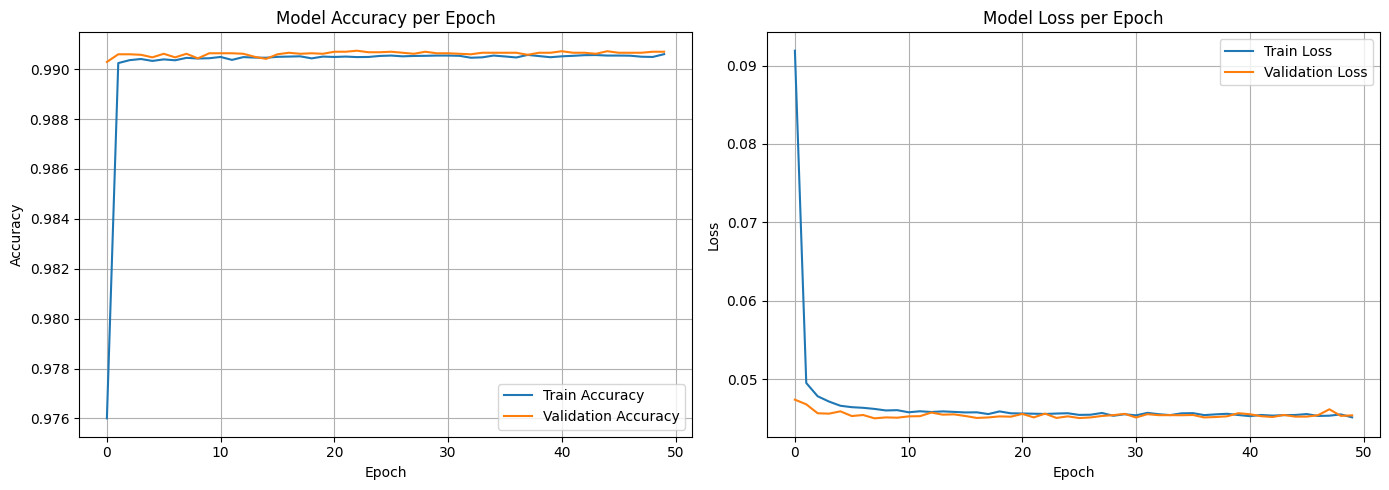

In [25]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(14, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [27]:
import pickle

model.save("model_lstm_stunting.h5")
scaler_path = "scaler.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)